## Física Estadística 2021-2. Tarea 2

Prof. Juan Valentín Escobar Sotomayor
### Rizo Franco Samantha
#### Fecha de entrega: viernes 11 de octubre de 2021

In [60]:
using Plots
using XLSX
using DelimitedFiles
using StatsBase
using ExcelFiles
using LaTeXStrings
using DataFrames
using Statistics

### Histogramas:
#### Para cada una de las tres series de datos que se postearon en el blog del curso:

In [61]:
Distribucion1=XLSX.readdata("Distribucion1.xlsx", "Worksheet!A1:A100000") #Se importan los datos de la distribución 1
Distribucion2=XLSX.readdata("Distribucion2.xlsx", "Worksheet!A1:A100000") #Se importan los datos de la distribución 2
Distribucion3=XLSX.readdata("Distribucion3.xlsx", "Worksheet!A1:A100000");#Se importan los datos de la distribución 3

D1=[] #Definimos un arreglo de ceros
D2=[] #Definimos un arreglo de ceros
D3=[] #Definimos un arreglo de ceros

for i in 1:100000
    push!(D1,Distribucion1[i]) #Se insertan los elementos de Distribucion1 en a colección D1 
    push!(D2,Distribucion2[i]) #Se insertan los elementos de Distribucion2 en a colección D2
    push!(D3,Distribucion3[i]) #Se insertan los elementos de Distribucion3 en a colección D3
end

#### a) Calcula los primeros cuatro momentos de las distribuciones.
Recordamos que los cuatros primeros momentos de las distribuciones se calculan de la siguiente forma,
    $$\Rightarrow \text{momento 1}\equiv <(X-\mu)^1>=0,$$
    $$\Rightarrow \text{momento 2}=\text{varianza}\equiv <(X-\mu)^2>,$$
    $$\Rightarrow \text{momento 3}=<(X-\mu)^3>,$$
    $$\Rightarrow \text{momento 4}=<(X-\mu)^4>,$$

In [75]:
function momentos(distribucion)
    μ=mean(distribucion) #Utilizamos la función de julia para calcular la media
    momento1 = [] #Arreglo de ceros
    momento2 = [] #Arreglo de ceros
    momento3 = [] #Arreglo de ceros
    momento4 = [] #Arreglo de ceros
    for i in 1:length(distribucion) #Ciclo de 1 a la longitud de nuestra distribución
        push!(momento1,(distribucion[i]-μ)^1)
        push!(momento2,(distribucion[i]-μ)^2)
        push!(momento3,(distribucion[i]-μ)^3)
        push!(momento4,(distribucion[i]-μ)^4)
    end
    return[mean(momento1),mean(momento2),mean(momento3),mean(momento4)]
end

momentos (generic function with 1 method)

In [70]:
tabla=DataFrame(Momento=["1","2","3","4"],
D1=momentos(D1),
D2=momentos(D2),
D3=momentos(D3))

,Momento,D1,D2,D3
,String,Float64,Float64,Float64
1,1,2.05347e-17,-4.24905e-17,-1.38243e-15
2,2,0.332964,3.97581,96583.5
3,3,0.000677868,0.0108351,5.93736e9
4,4,0.199968,47.398,5.53805e14


#### b) Construye histogramas de cada distribución. (Pista: para la serie de datos #3, construye un histograma con 200 bins, donde el primer bin del histograma comience en -500, y el tamaño de los bins sea igual a 5. Gráfica este histograma en escala semi logarítmica.)

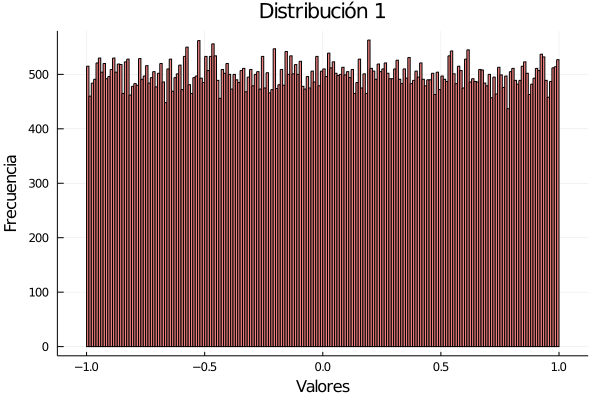

In [83]:
plot(title="Distribución 1",xlabel="Valores",ylabel="Frecuencia") #Asignamos nombres a la gráfica y ejes
histogram!(D1,bins=240,label=false,color=:lightcoral)

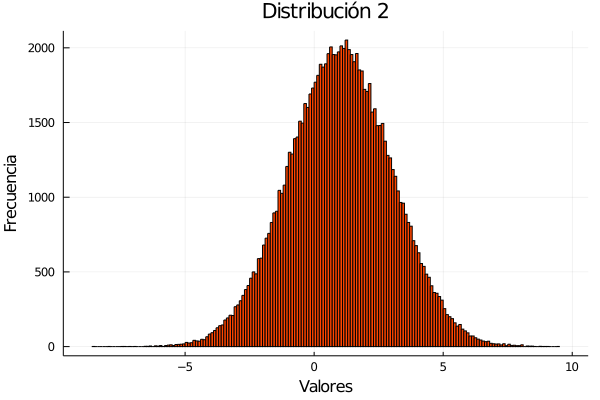

In [85]:
plot(title="Distribución 2",xlabel="Valores",ylabel="Frecuencia") #Asignamos nombres a la gráfica y ejes
histogram!(D2,bins=250,label=false,color=:orangered)

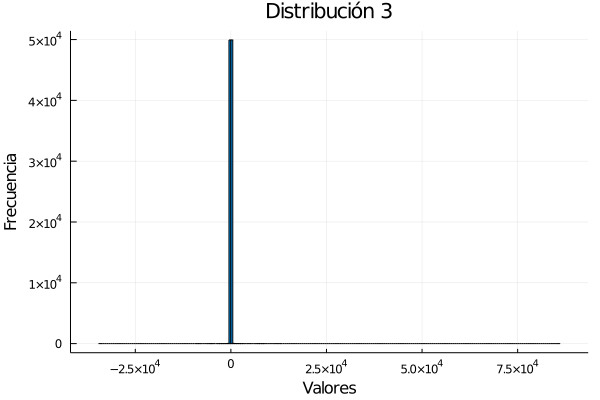

In [86]:
plot(title="Distribución 3",xlabel="Valores",ylabel="Frecuencia") #Asignamos nombres a la gráfica y ejes
histogram!(D3,bins=300,label=false)

Para apreciar mejor los datos de la gráfica usamos escala logaritmica en el eje y y simétrico respecto al 0 en ele x:

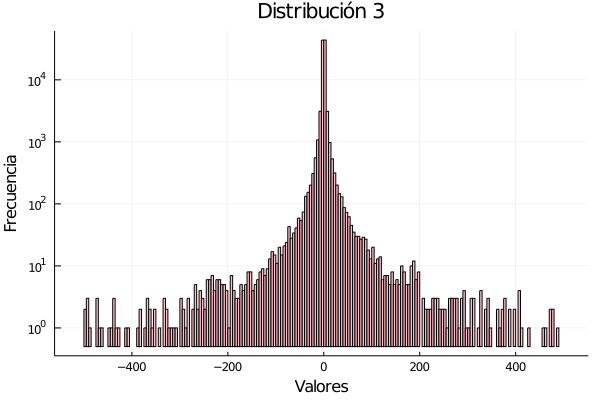

In [89]:
plot(title="Distribución 3",xlabel="Valores",ylabel="Frecuencia") #Asignamos nombres a la gráfica y ejes
histogram!(D3,bins=-500:5:500,yscale=:log10,label=false,color=:pink)

#### c)¿A qué distribución es probable que corresponda cada una de estas series de datos? Justifica tu respuesta.
Para definir esto, debemos calculas las "kurtosis" de las 3 distribuciones.

In [93]:
function skenessykurtosis(distribucion)
    μ=mean(distribucion) #Utilizamos la función de julia para calcular la media
    momento3 = [] #Arreglo de ceros
    momento4 = [] #Arreglo de ceros
    for i in 1:length(distribucion) #Ciclo de 1 a la longitud de nuestra distribución
        push!(momento3,(distribucion[i]-μ)^3)
        push!(momento4,(distribucion[i]-μ)^4)
    end
    return[mean(momento3)/((var(distribucion))^(3/2)),mean(momento4)/((var(distribucion))^2)]
end

skenessykurtosis (generic function with 1 method)

In [95]:
tabla=DataFrame(Forma=["skeness","kurtosis"],
D1=skenessykurtosis(D1),
D2=skenessykurtosis(D2),
D3=skenessykurtosis(D3))

,Forma,D1,D2,D3
,String,Float64,Float64,Float64
1,skeness,0.00352812,0.00136675,197.803
2,kurtosis,1.80368,2.99848,59366.6
